# Loan Approval Prediction

In [250]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
warnings.simplefilter('ignore')

In [251]:
train_data = pd.read_csv(r'C:\Users\IDEAPAD\Desktop\GOMYCODE\DataSet\Loan Dataset\train_u6lujuX_CVtuZ9i.csv')
test_data = pd.read_csv(r'C:\Users\IDEAPAD\Desktop\GOMYCODE\DataSet\Loan Dataset\test_Y3wMUE5_7gLdaTN.csv')
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [252]:
train_data.shape

(614, 13)

In [253]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [254]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [255]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [256]:
train_data = train_data.drop('Loan_ID', axis=1)

In [257]:
# Replace Nul Value
# data = data.dropna(axis = 0)
# data.shape => (480, 12) contre (367, 12) pour le test_data... les train data sont trop peu

# Nous remplacez les valeurs manquantes par le mode de chaque attributs
for i in train_data.columns:
    train_data[i] = train_data[i].fillna(train_data[i].mode()[0])
    
for j in test_data.columns:
    test_data[j] = test_data[j].fillna(test_data[j].mode()[0])

In [258]:
# Fonctionnalité pour recueillir le revenu total de chaque individu
train_data['TotalIncome'] = train_data['ApplicantIncome'] + train_data['CoapplicantIncome']
test_data['TotalIncome'] = test_data['ApplicantIncome'] + test_data['CoapplicantIncome']

train_data = train_data.drop(['ApplicantIncome', 'CoapplicantIncome'], axis = 1)
test_data = test_data.drop(['ApplicantIncome', 'CoapplicantIncome'], axis = 1)

Text(0.5, 1.0, "Nombre d'hommes et de femmes")

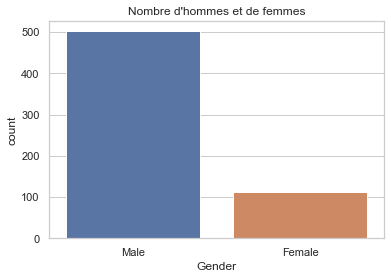

In [259]:
sns.set_theme(style="whitegrid")
sns.countplot(data=train_data,  x="Gender")
plt.title("Nombre d'hommes et de femmes")

Text(0.5, 1.0, 'Corrélation Married & Loan_Status')

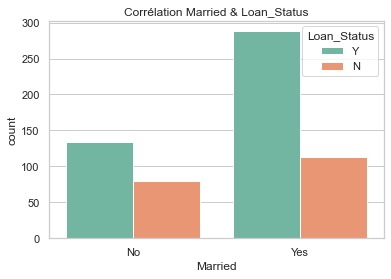

In [260]:
sns.countplot(data=train_data,  x="Married", hue="Loan_Status", palette='Set2')
plt.title("Corrélation Married & Loan_Status")

Text(0.5, 1.0, 'Corrélation Self_Employed & Loan_Status')

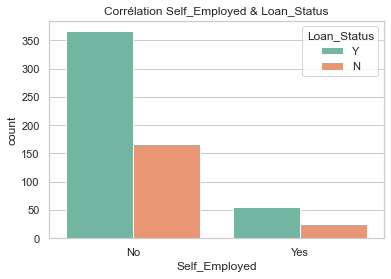

In [261]:
sns.countplot(data=train_data,  x="Self_Employed", hue="Loan_Status", palette='Set2')
plt.title("Corrélation Self_Employed & Loan_Status")

Text(0.5, 1.0, 'Corrélation Property_Area & Loan_Status')

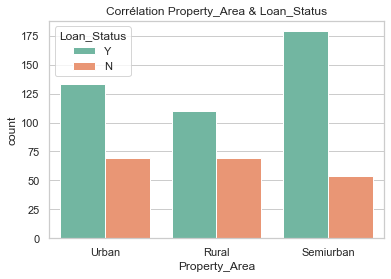

In [262]:
sns.countplot(data=train_data,  x="Property_Area", hue="Loan_Status", palette='Set2')
plt.title("Corrélation Property_Area & Loan_Status")

Text(0.5, 1.0, 'Corrélation Education & Loan_Status')

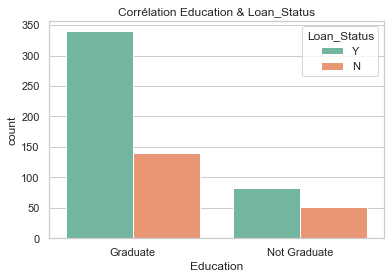

In [263]:
sns.countplot(data=train_data,  x="Education", hue="Loan_Status", palette='Set2')
plt.title("Corrélation Education & Loan_Status")

Text(0.5, 1.0, 'Pourcentange de Ceux qui ont des enfants')

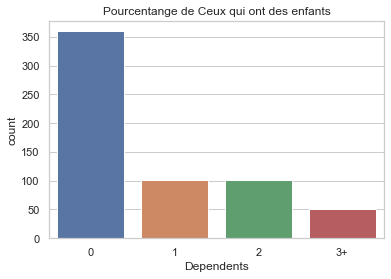

In [264]:
sns.countplot(data=train_data,  x="Dependents")
plt.title("Pourcentange de Ceux qui ont des enfants")

Text(0.5, 1.0, 'Corrélation Dependents & Loan_Status')

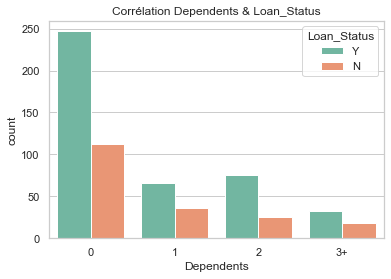

In [265]:
sns.countplot(data=train_data,  x="Dependents", hue="Loan_Status", palette='Set2')
plt.title("Corrélation Dependents & Loan_Status")

Text(0.5, 1.0, 'Corrélation Credit_History & Loan_Status')

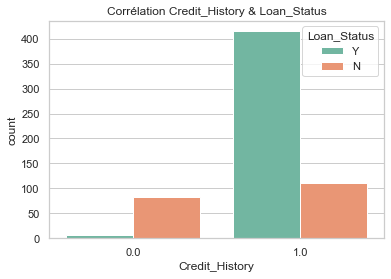

In [266]:
sns.countplot(data=train_data,  x="Credit_History", hue="Loan_Status", palette='Set2')
plt.title("Corrélation Credit_History & Loan_Status")

Text(0.5, 1.0, 'Corrélation LoanAmount & Loan_Status')

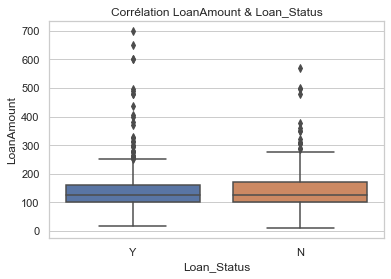

In [267]:
sns.boxplot(x="Loan_Status",y="LoanAmount", data=train_data)
plt.title("Corrélation LoanAmount & Loan_Status")

In [268]:
# Transformation de Nos données catégorielles
encoder = LabelEncoder()
cat_train_data = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for i in cat_train_data:
    train_data[i] = encoder.fit_transform(train_data[i])
train_data.head()
# Male : 0 && Female : 1
# Married => No : 0 && Yes : 1
# Education => Graduate : 0 && Not Graduate : 1
# Self_Employed => No : 0 && Yes : 1
# Property_Area	=> Urban : 2 && Rural : 0 && Semi-Urban : 1
# Loan_Status => Yes : 1 && No : 0

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,1,0,0,0,0,120.0,360.0,1.0,2,1,5849.0
1,1,1,1,0,0,128.0,360.0,1.0,0,0,6091.0
2,1,1,0,0,1,66.0,360.0,1.0,2,1,3000.0
3,1,1,0,1,0,120.0,360.0,1.0,2,1,4941.0
4,1,0,0,0,0,141.0,360.0,1.0,2,1,6000.0


In [269]:
cat_test_data = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
for i in cat_test_data:
    test_data[i] = encoder.fit_transform(test_data[i])
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome
0,LP001015,1,1,0,0,0,110.0,360.0,1.0,2,5720
1,LP001022,1,1,1,0,0,126.0,360.0,1.0,2,4576
2,LP001031,1,1,2,0,0,208.0,360.0,1.0,2,6800
3,LP001035,1,1,2,0,0,100.0,360.0,1.0,2,4886
4,LP001051,1,0,0,1,0,78.0,360.0,1.0,2,3276


# Model Training

In [177]:
def Evaluation(model, x, y):
    cv = StratifiedKFold(5)
    score = cross_val_score(model, x, y, cv = cv)
    print(("Score : {}%").format(round(np.mean(score)*100, 2)))

In [183]:
X = train_data.drop('Loan_Status', axis=1)
y = train_data['Loan_Status']

In [203]:
# Random Forest Classifier
params_grid = {
    "criterion" : ['gini', 'entropy'],
    "max_depth" : [5, 6, 7, 8],
    "max_features" : ['auto', 'sqrt', 'log2']
}
grid = GridSearchCV(RandomForestClassifier(n_estimators=100), params_grid, cv=5)
grid.fit(X, y)
model = grid.best_estimator_
Evaluation(model, X, y)

Score : 80.13%


In [204]:
# KNN
knn_params = {
    "n_neighbors" : np.arange(1, 20),
    "weights" : ['uniform', 'distance'],
    "algorithm" : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    "metric" : ['euclidean', 'manhattan', 'minkowski']
}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv = 5)
knn_grid.fit(X, y)
knn_model = knn_grid.best_estimator_
Evaluation(knn_model, X, y)

Score : 68.57%


In [209]:
# Regression Logistique
rl_params = {
    "penalty" : ['l1', 'l2', 'elasticnet', None],
    "dual" : [True, False],
    "fit_intercept" : [True, False],
    "solver" : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    "max_iter" : [200]
}
rl_grid = GridSearchCV(LogisticRegression(), rl_params, cv = 5)
rl_grid.fit(X, y)
rl_model = rl_grid.best_estimator_
Evaluation(rl_model, X, y)

Score : 80.46%


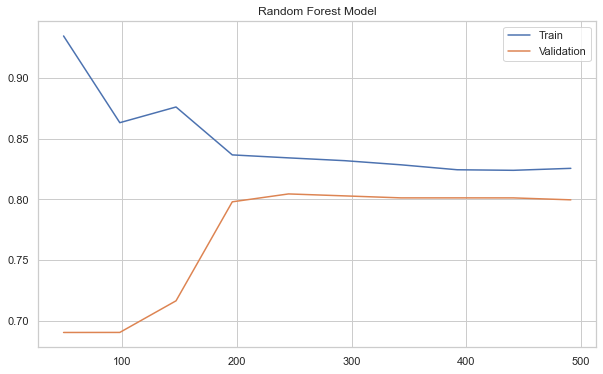

In [211]:
# Voir l'évolution de nos différents models
# Voir si Notre modèle peu encore évolué => Learning_curve
N, train_score, val_score = learning_curve(model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)
plt.figure(figsize=(10, 6))
plt.plot(N, train_score.mean(axis = 1), label = "Train")
plt.plot(N, val_score.mean(axis = 1), label = "Validation")
plt.title("Random Forest Model")
plt.legend()

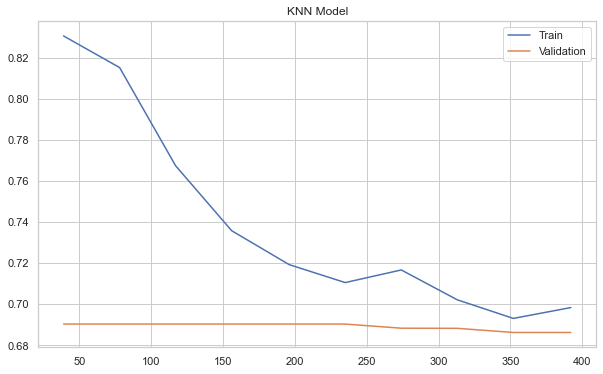

In [212]:
# Voir si Notre modèle peu encore évolué => Learning_curve
N, train_score, val_score = learning_curve(knn_model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)
plt.figure(figsize=(10, 6))
plt.plot(N, train_score.mean(axis = 1), label = "Train")
plt.plot(N, val_score.mean(axis = 1), label = "Validation")
plt.title("KNN Model")
plt.legend()

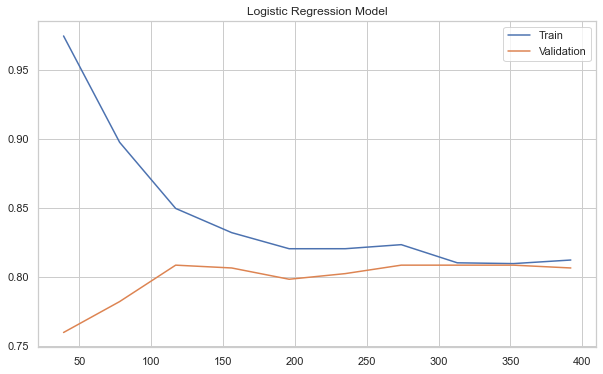

In [214]:
# Voir si Notre modèle peu encore évolué => Learning_curve
N, train_score, val_score = learning_curve(rl_model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)
plt.figure(figsize=(10, 6))
plt.plot(N, train_score.mean(axis = 1), label = "Train")
plt.plot(N, val_score.mean(axis = 1), label = "Validation")
plt.title("Logistic Regression Model")
plt.legend()

# Choix Définitif du Model

In [278]:
rl = rl_model.predict(test_data.drop('Loan_ID', axis=1))
rl

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [287]:
# Conversion du tableau des résultats en DataFrame puis en fichier csv
Result_Test = pd.DataFrame({
    "Loan_ID": test_data['Loan_ID'],
    "Loan_Status": rl
    })

Result_Test.to_csv("predictions.csv", encoding='utf-8', index=False)